## A.I. Assignment 4

## Learning Goals

By the end of this lab, you should be able to:
* Get familiar with tensors in pytorch
* Get familiar with the activation functions for ANN 
* Create a simple perceptron model with pytorch



## Common activation functions for ANN:

##### Sigmoid:

The sigmoid function is a popular choice for activation functions in neural networks. It has an $S-shaped$ curve:
$$f(x) = \frac{1}{1+e^{-x}}.$$

It has a number of appealing qualities:

1. *Nonlinearity*: Because the sigmoid function is nonlinear, it enables the neural network to simulate nonlinear interactions between inputs and outputs. A neural network would simply be a linear model without a nonlinear activation function like sigmoid, which would significantly restrict its capacity to describe complex relationships.

1. *Smoothness*: As the sigmoid function is differentiable and smooth, its derivative exist at every point. This is significant because it makes it possible for neural network training techniques based on gradients (such as backpropagation) to perform well.

1. *Boundedness*: The sigmoid function is bounded between 0 and 1, it means  its outputs can be interpreted as probabilities.  It is most useful in applications like binary classification, where the goal is to predict whether an input belongs to one of two classes.

1. *Monotonicity*: The sigmoid function is monotonic, which means that its outputs are always increasing or always decreasing with respect to its inputs. This makes it easy to interpret the effect of changes in input variables on the output of the network.

##### ReLU (Rectified Linear Unit):

The ReLU function is defined as $$f(x) = max(0, x).$$

It is a widely used activation function in deep learning due to its simplicity and effectiveness.

##### Tanh (Hyperbolic Tangent):

The $\tanh$ function is similar to the sigmoid function but produces outputs in the interval $[-1, 1]$:  
$$f(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}.$$

##### Softmax:

The softmax function is commonly used in the output layer of a neural network for multi-class classification problems. It normalizes the output into a probability distribution over the classes.

Given a vector $\vec{z}$ of $n$ real numbers, the softmax function calculates a vector $\vec{s}$ of $n$ real numbers with the components:
$$s_j = \frac{e^{z_j}}{\sum_{k=1}^{n} {e^{z_k}}}.$$


##### Leaky ReLU:

The Leaky ReLU is a variation of the ReLU function that introduces a small non-zero gradient for negative inputs. It is defined as 
$$f(x) = max(0.01 \cdot x, x).$$

##### ELU (Exponential Linear Unit):

The ELU function is another variation of the ReLU function that introduces a small negative saturation value for negative inputs. It is defined as 

$$ f(x) = \biggl\{ \begin{matrix} x, & for & x > 0 \\
                      \alpha \cdot (e^{x} - 1), & for & x \leq 0 \end{matrix}$$
where $\alpha$ is a hyperparameter.

##### Swish:

The Swish function is a recent activation function that is a smooth approximation of the ReLU function. It is defined as f(x) = x * sigmoid(x).

In [2]:
import torch
torch.cuda.is_available()

False

create a tensor with requires_grad=True to tell PyTorch to track gradients for this tensor:

In [3]:
x = torch.tensor([2.0], requires_grad=True)
print(x)

tensor([2.], requires_grad=True)


You can perform any operations on this tensor as usual:

In [4]:
y = x ** 2 + 2 * x + 1
print(y)

tensor([9.], grad_fn=<AddBackward0>)


To compute the gradients of y with respect to x, you need to call backward() on y:

In [5]:
y.backward()

In [6]:
x.grad

tensor([6.])

In [7]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([1., 2., 3.], requires_grad=True)

# Compute a function of x
y = x.sum()

# Compute gradients of y with respect to x
y.backward()

# Print gradients of x
print(x.grad)


tensor([1., 1., 1.])


Exercise 1.

Compute the gradient for the sigmoid activation function in 2 points using pytorch and check it with the known explicit formula 

In [8]:
import torch
from torch.autograd import grad
import math

x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(2.0, requires_grad=True)

y1 = torch.sigmoid(x1)
y2 = torch.sigmoid(x2)

grad_y1 = grad(y1, x1, create_graph=True)[0]
grad_y2 = grad(y2, x2, create_graph=True)[0]

print("Gradient x1:", grad_y1.item())
print("Gradient x2:", grad_y2.item())

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

grad_y1_expected = sigmoid(x1)*(1 - sigmoid(x1))
grad_y2_expected = sigmoid(x2)*(1 - sigmoid(x2))

print("Expected x1:", grad_y1_expected)
print("Expected x2:", grad_y2_expected)

Gradient x1: 0.1966119259595871
Gradient x2: 0.10499362647533417
Expected x1: 0.19661193324148185
Expected x2: 0.10499358540350662


Exercise 2.

Compute the gradient for the linear activation function in 2 points using pytorch and check it with the known explicit formula

In [9]:
x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(2.0, requires_grad=True)

y1 = x1
y2 = x2

grad_y1 = grad(y1, x1, create_graph=True)[0]
grad_y2 = grad(y2, x2, create_graph=True)[0]

print("Gradient x1:", grad_y1.item())
print("Gradient x2:", grad_y2.item())

grad_y1_expected = 1.0
grad_y2_expected = 1.0

print("Expected x1:", grad_y1_expected)
print("Expected x2:", grad_y2_expected)

Gradient x1: 1.0
Gradient x2: 1.0
Expected x1: 1.0
Expected x2: 1.0


Execise 3.

Compute the gradient for the relu activation function in 2 points using pytorch and check it with the known explicit formula.

In [10]:
x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(-2.0, requires_grad=True)

y1 = torch.relu(x1)
y2 = torch.relu(x2)

grad_y1 = grad(y1, x1, create_graph=True)[0]
grad_y2 = grad(y2, x2, create_graph=True)[0]

print("Gradient x1:", grad_y1.item())
print("Gradient x2:", grad_y2.item())

grad_y1_expected = 1.0
grad_y2_expected = 0.0

print("Expected x1:", grad_y1_expected)
print("Expected x2:", grad_y2_expected)

Gradient x1: 1.0
Gradient x2: 0.0
Expected x1: 1.0
Expected x2: 0.0


Exercise 4. 

Write in python a function to plot the sigmoid activation function and its gradient using matplotlib

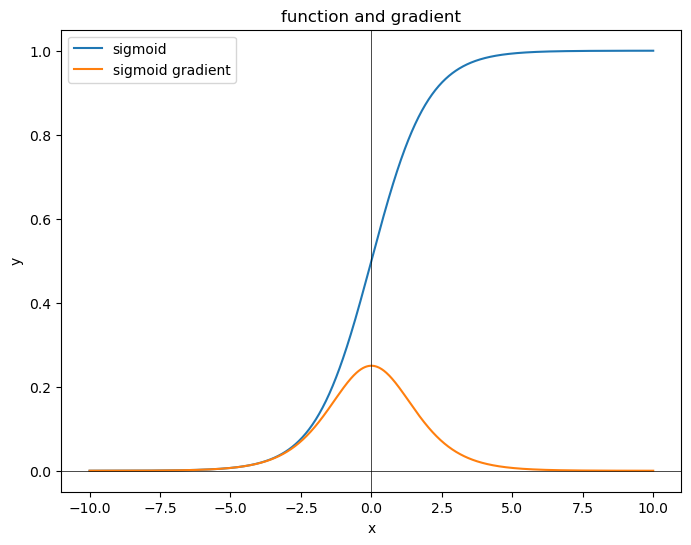

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_gradient(x):
    s = sigmoid(x)
    return s * (1 - s)

x = np.linspace(-10, 10, 1000)
y = sigmoid(x)
dy = sigmoid_gradient(x)

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, label='sigmoid')
ax.plot(x, dy, label='sigmoid gradient')
ax.axhline(0, color='black', lw=0.5)
ax.axvline(0, color='black', lw=0.5)
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('function and gradient')

plt.show()


Exercise 5. 

Write in python a function to plot the ReLU activation function and its gradient using matplotlib.

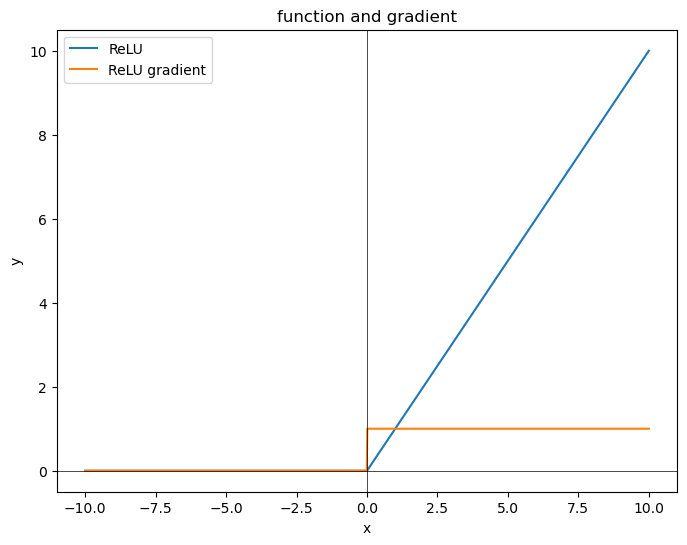

In [12]:
def relu(x):
    return np.maximum(0, x)

def relu_gradient(x):
    return np.where(x > 0, 1, 0)

x = np.linspace(-10, 10, 1000)
y = relu(x)
dy = relu_gradient(x)

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, label='ReLU')
ax.plot(x, dy, label='ReLU gradient')
ax.axhline(0, color='black', lw=0.5)
ax.axvline(0, color='black', lw=0.5)
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('function and gradient')

plt.show()
    

Exercise 6. 

Write in python a function to plot the tanh activation function and its gradient using matplotlib.

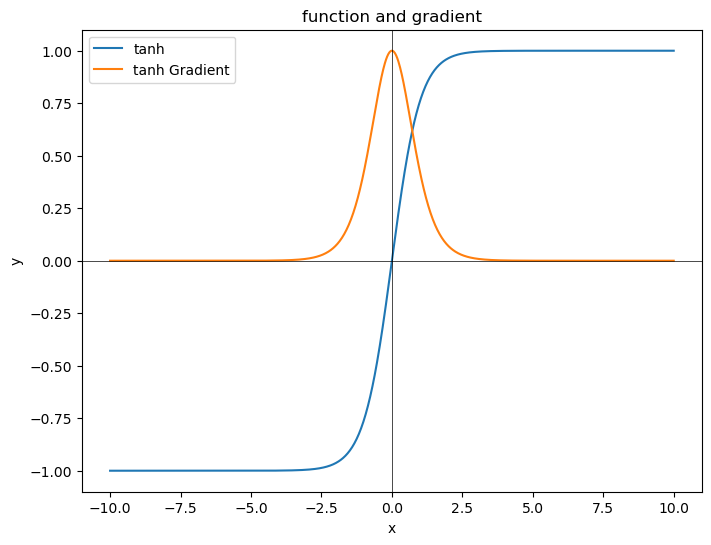

In [13]:
def tanh(x):
    return np.tanh(x)

def tanh_gradient(x):
    return 1 - np.tanh(x)**2

def plot_tanh():
    x = np.linspace(-10, 10, 1000)
    y = tanh(x)
    dy = tanh_gradient(x)

    fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(x, y, label='tanh')
    ax.plot(x, dy, label='tanh Gradient')
    ax.axhline(0, color='black', lw=0.5)
    ax.axvline(0, color='black', lw=0.5)
    ax.legend(loc='best')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('function and gradient')

    plt.show()
    
plot_tanh()

Exercise 7. 

Write in python a function to plot the softmax activation function.

Exercise 8. 

Write in python a function to plot the leaky ReLU activation function and its gradient using matplotlib.

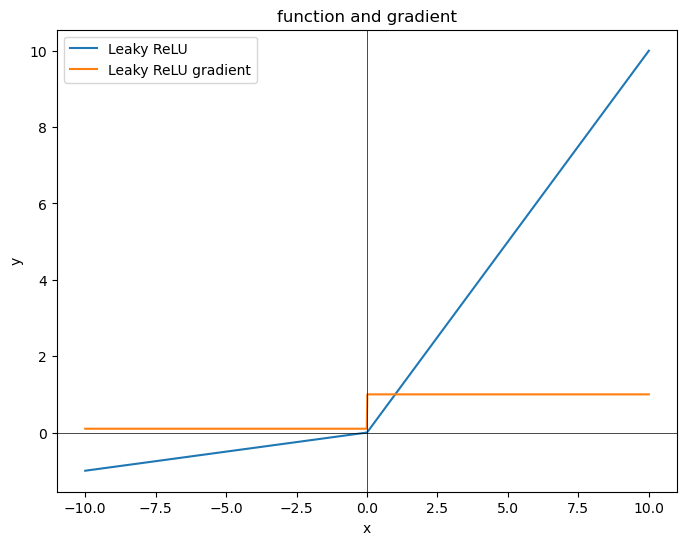

In [14]:
def leaky_relu(x, alpha=0.1):
    return np.where(x >= 0, x, alpha * x)

def leaky_relu_gradient(x, alpha=0.1):
    return np.where(x >= 0, 1, alpha)

def plot_leaky_relu():
    x = np.linspace(-10, 10, 1000)
    y = leaky_relu(x)
    dy = leaky_relu_gradient(x)

    fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(x, y, label='Leaky ReLU')
    ax.plot(x, dy, label='Leaky ReLU gradient')
    ax.axhline(0, color='black', lw=0.5)
    ax.axvline(0, color='black', lw=0.5)
    ax.legend(loc='best')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('function and gradient')

    plt.show()
    
plot_leaky_relu()

## Perceptron

We define a class called *Perceptron* that inherits from *torch.nn.Module*. 

In the constructor, we define a single fully-connected linear layer with $input_dim$ inputs and $output_dim$ outputs, and a $sigmoid$ activation function. In the forward method, we apply the linear transformation to the input $x$, and then apply the sigmoid activation function to the output.



In [15]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x


 We create an instance of this model and use it to make predictions like this:

In [16]:
perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)


tensor([0.3759], grad_fn=<SigmoidBackward0>)


In [17]:

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.3082
Epoch [200/1000], Loss: 0.2746
Epoch [300/1000], Loss: 0.2603
Epoch [400/1000], Loss: 0.2520
Epoch [500/1000], Loss: 0.2466
Epoch [600/1000], Loss: 0.2426
Epoch [700/1000], Loss: 0.2397
Epoch [800/1000], Loss: 0.2373
Epoch [900/1000], Loss: 0.2354
Epoch [1000/1000], Loss: 0.2339


Exercise 9: 

Implement a binary classification model using the Perceptron class in PyTorch for the logic OR. 

Your task is to create a Perceptron instance and train it using a proper  dataset and the binary cross-entropy loss with stochastic gradient descent optimizer. 

Here are the steps you can follow:

Define a Perceptron class that inherits from torch.nn.Module and implements a binary classification model.

Define a binary cross-entropy loss function using the torch.nn.BCEWithLogitsLoss module.

Define a stochastic gradient descent optimizer using the torch.optim.SGD module.

Train the Perceptron model on the training set using the binary cross-entropy loss and stochastic gradient descent optimizer.

Evaluate the trained model compute the accuracy.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim


X_train = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
y_train = torch.tensor([[0],[1],[1],[1]], dtype=torch.float32)


class ORPerceptron(nn.Module):
    def __init__(self):
        super(ORPerceptron, self).__init__()
        self.fc = nn.Linear(2, 1)

    def forward(self, x):
        x = self.fc(x)
        return x


criterion = nn.BCEWithLogitsLoss()
model = ORPerceptron()


learning_rate = 0.2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Train the Perceptron model
num_epochs = 10000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the trained model and compute the accuracy
with torch.no_grad():
    predictions = torch.sigmoid(model(X_train))
    predicted_classes = torch.round(predictions)
    accuracy = torch.mean((predicted_classes == y_train).float())
    print(f"Accuracy: {accuracy.item()}")

Epoch [100/10000], Loss: 0.2617
Epoch [200/10000], Loss: 0.1798
Epoch [300/10000], Loss: 0.1354
Epoch [400/10000], Loss: 0.1079
Epoch [500/10000], Loss: 0.0893
Epoch [600/10000], Loss: 0.0759
Epoch [700/10000], Loss: 0.0659
Epoch [800/10000], Loss: 0.0581
Epoch [900/10000], Loss: 0.0520
Epoch [1000/10000], Loss: 0.0469
Epoch [1100/10000], Loss: 0.0428
Epoch [1200/10000], Loss: 0.0393
Epoch [1300/10000], Loss: 0.0363
Epoch [1400/10000], Loss: 0.0337
Epoch [1500/10000], Loss: 0.0315
Epoch [1600/10000], Loss: 0.0295
Epoch [1700/10000], Loss: 0.0278
Epoch [1800/10000], Loss: 0.0262
Epoch [1900/10000], Loss: 0.0248
Epoch [2000/10000], Loss: 0.0236
Epoch [2100/10000], Loss: 0.0224
Epoch [2200/10000], Loss: 0.0214
Epoch [2300/10000], Loss: 0.0205
Epoch [2400/10000], Loss: 0.0196
Epoch [2500/10000], Loss: 0.0188
Epoch [2600/10000], Loss: 0.0181
Epoch [2700/10000], Loss: 0.0174
Epoch [2800/10000], Loss: 0.0168
Epoch [2900/10000], Loss: 0.0162
Epoch [3000/10000], Loss: 0.0156
Epoch [3100/10000],